In [37]:
%load_ext autoreload
%autoreload 2

[autoreload of solardatatools failed: Traceback (most recent call last):
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/__init__.py", line 5, in <module>
    from solardatatools.clear_day_detection import ClearDayDetection
ImportError: cannot import name 'ClearDayDe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
import sys
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
# PVInsight Code Imports
from pathlib import Path
sdt_path = str(Path.cwd().parent.parent.parent)
sys.path.append(sdt_path)
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

In [39]:
fn = 'data_handler_input.csv'
if os.path.isfile(fn):
    data_frame = pd.read_csv(fn, index_col=0)
else:
    data_frame = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY', standardize=False)
    data_frame.to_csv(fn)

In [40]:
data_frame["Date-Time"] = pd.to_datetime(data_frame["Date-Time"])

In [41]:
df1 = data_frame.set_index("Date-Time")
df1

,SiteID,ac_power,dc_power,inv1_ac_power,inv1_dc_current,inv1_dc_power,inv1_dc_voltage,inv1_temp,inv2_ac_power,inv2_dc_current,...,inv6_ac_power,inv6_dc_current,inv6_dc_power,inv6_dc_voltage,inv6_temp,inv7_ac_power,inv7_dc_current,inv7_dc_power,inv7_dc_voltage,inv7_temp
Date-Time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 07:20:32,1199,0.000000,0.000000,0.000000,0.000000,0.000000,289.200000,16.900000,0.000000,0.000000,...,0.000000,0.000000,0.000000,277.600000,16.9000,0.000000,0.000000,0.000000,279.000000,15.700000
2015-01-01 07:25:33,1199,0.000000,0.000000,0.000000,0.000000,0.000000,289.000000,16.900000,0.000000,0.000000,...,0.000000,0.000000,0.000000,301.125000,16.9000,0.000000,0.000000,0.000000,300.285714,15.700000
2015-01-01 07:30:34,1199,5.361111,35.755449,0.000000,0.000000,0.000000,305.875000,16.987500,0.125000,0.007250,...,0.250000,0.012625,3.954781,313.250000,16.9875,1.111111,0.022889,6.813292,297.666667,15.700000
2015-01-01 07:35:34,1199,71.482142,305.379709,8.714286,0.126000,37.836000,300.285714,17.500000,13.285714,0.195714,...,9.428571,0.153143,42.858162,279.857143,17.5000,7.428571,0.122143,35.613409,291.571429,15.785714
2015-01-01 07:40:34,1199,175.196428,493.599934,28.875000,0.291375,75.174750,258.000000,17.600000,33.000000,0.309000,...,27.250000,0.284375,72.515625,255.000000,17.6000,20.428571,0.251857,64.511372,256.142857,16.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 16:50:42,1199,4.303571,31.739720,2.142857,0.033000,10.390286,314.857143,29.328571,0.000000,0.000000,...,0.285714,0.014286,4.367434,305.714286,29.5000,0.000000,0.000000,0.000000,311.375000,27.525000
2017-12-31 16:55:42,1199,0.000000,0.000000,0.000000,0.000000,0.000000,297.625000,28.900000,0.000000,0.000000,...,0.000000,0.000000,0.000000,287.625000,28.9750,0.000000,0.000000,0.000000,296.750000,27.375000
2017-12-31 17:00:42,1199,0.000000,0.000000,0.000000,0.000000,0.000000,303.875000,28.900000,0.000000,0.000000,...,0.000000,0.000000,0.000000,307.250000,28.9000,0.000000,0.000000,0.000000,300.875000,27.075000


In [42]:
df1.index

DatetimeIndex(['2015-01-01 07:20:32', '2015-01-01 07:25:33',
               '2015-01-01 07:30:34', '2015-01-01 07:35:34',
               '2015-01-01 07:40:34', '2015-01-01 07:45:34',
               '2015-01-01 07:50:34', '2015-01-01 07:55:35',
               '2015-01-01 08:00:37', '2015-01-01 08:05:37',
               ...
               '2017-12-31 16:25:39', '2017-12-31 16:30:40',
               '2017-12-31 16:35:41', '2017-12-31 16:40:42',
               '2017-12-31 16:45:42', '2017-12-31 16:50:42',
               '2017-12-31 16:55:42', '2017-12-31 17:00:42',
               '2017-12-31 17:05:42', '2017-12-31 17:10:42'],
              dtype='datetime64[ns]', name='Date-Time', length=160837, freq=None)

In [43]:
# dh = DataHandler(data_frame, datetime_col="Date-Time")
dh = DataHandler(df1)
# dh.fix_dst() # try without to fix shifts
dh.run_pipeline(power_col='ac_power', fix_shifts=True, correct_tz=False, solver="MOSEK")

Invoking periodic timeshift detector.
total time: 21.48 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.05s
Cleaning                   15.36s
Filtering/Summarizing      2.07s
    Data quality           0.32s
    Clear day detect       0.41s
    Clipping detect        0.29s
    Capacity change detect 1.05s



In [44]:
dh.report()


-----------------
DATA SET REPORT
-----------------
length               3.00 years
capacity estimate    40.99 kW
data sampling        5 minutes
quality score        0.96
clearness score      0.18
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    True
time zone errors     False
            


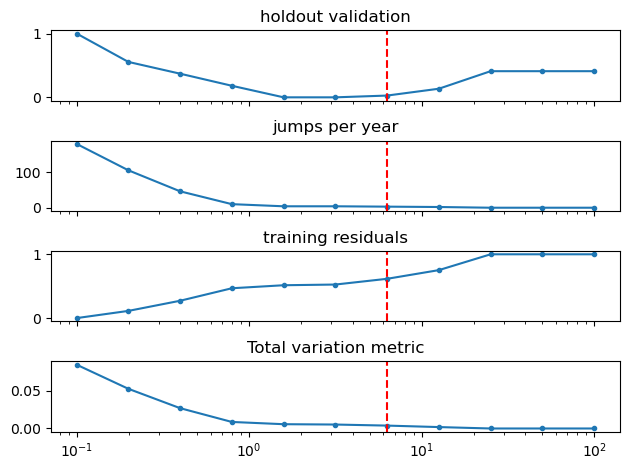

In [45]:
dh.time_shift_analysis.plot_optimization();

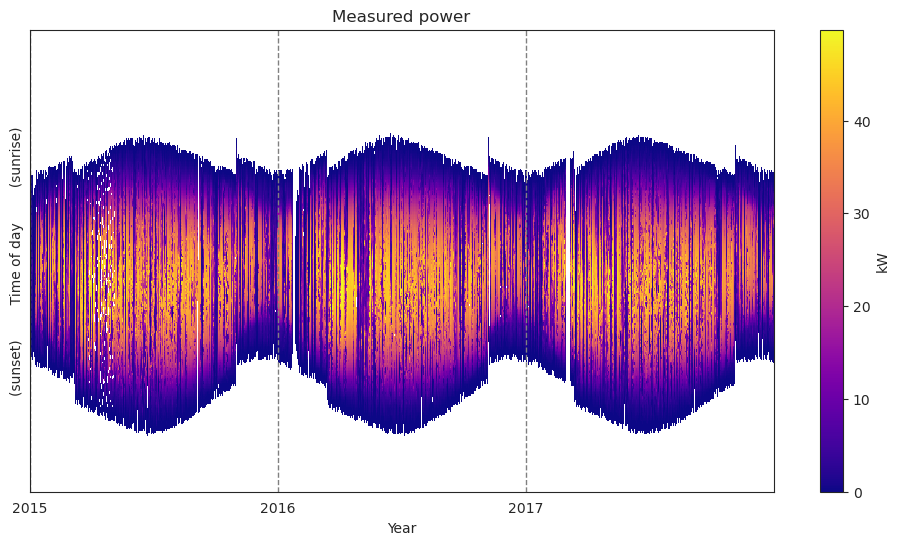

In [46]:
dh.plot_heatmap('raw');

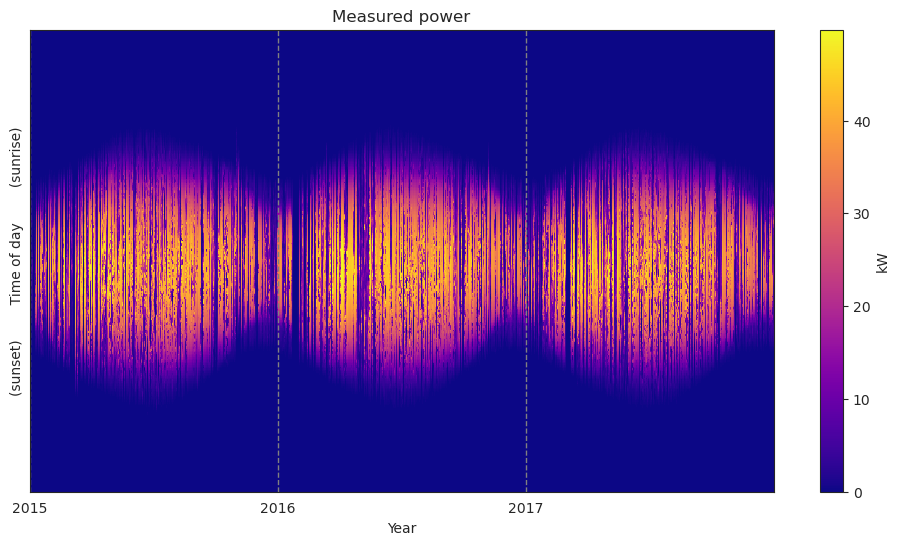

In [47]:
dh.plot_heatmap('filled');

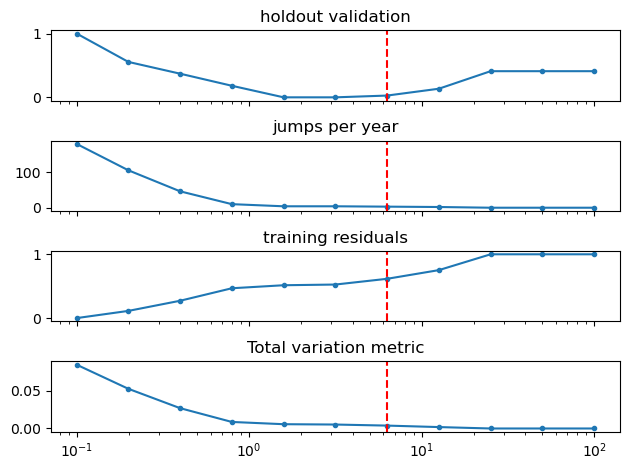

In [48]:
dh.time_shift_analysis.plot_optimization();

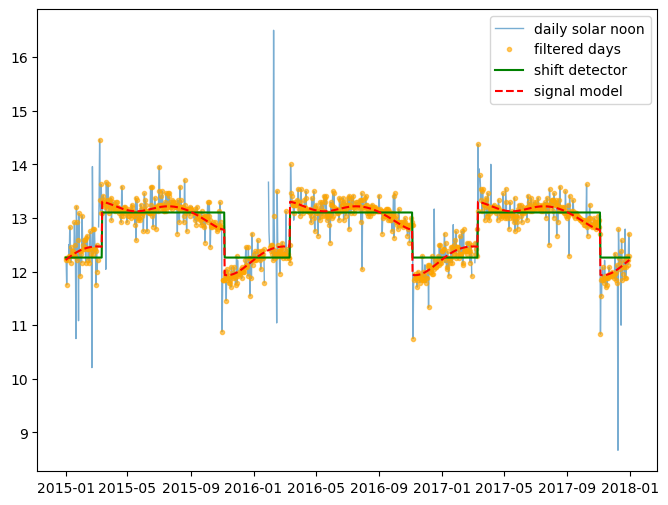

In [49]:
dh.plot_time_shift_analysis_results();

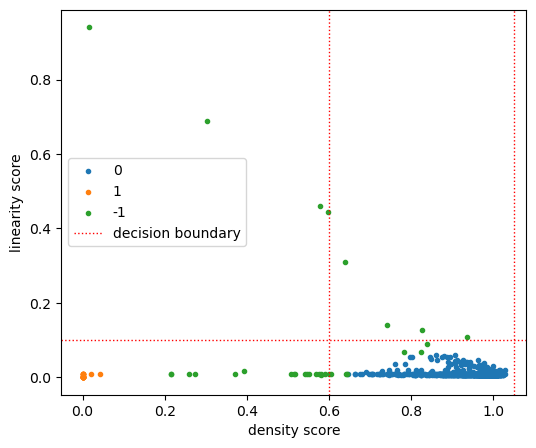

In [50]:
dh.plot_data_quality_scatter();

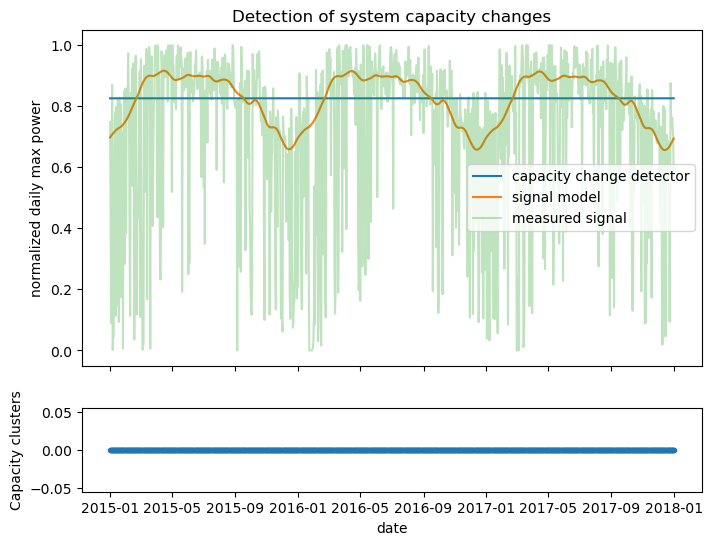

In [51]:
dh.plot_capacity_change_analysis();

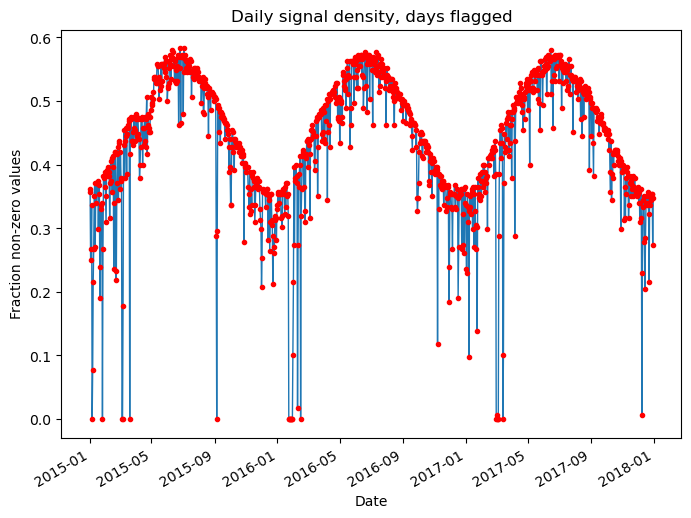

In [52]:
dh.plot_density_signal();

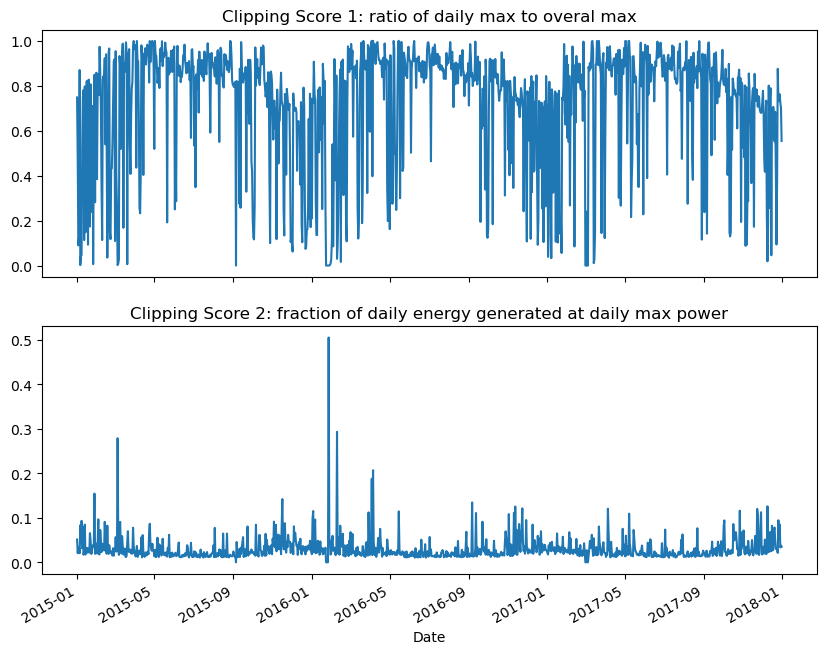

In [53]:
dh.plot_clipping();

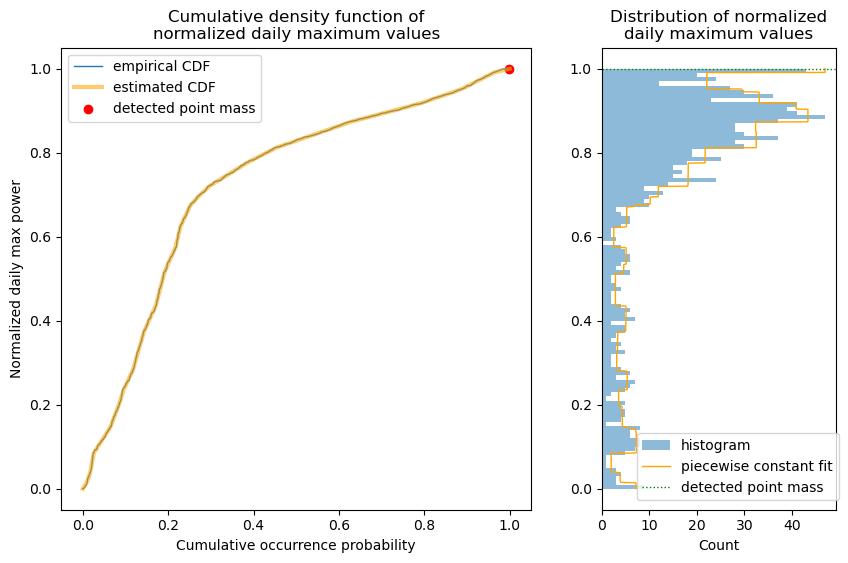

In [54]:
dh.plot_daily_max_cdf_and_pdf();

In [55]:
dh.report()


-----------------
DATA SET REPORT
-----------------
length               3.00 years
capacity estimate    40.99 kW
data sampling        5 minutes
quality score        0.96
clearness score      0.18
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    True
time zone errors     False
            


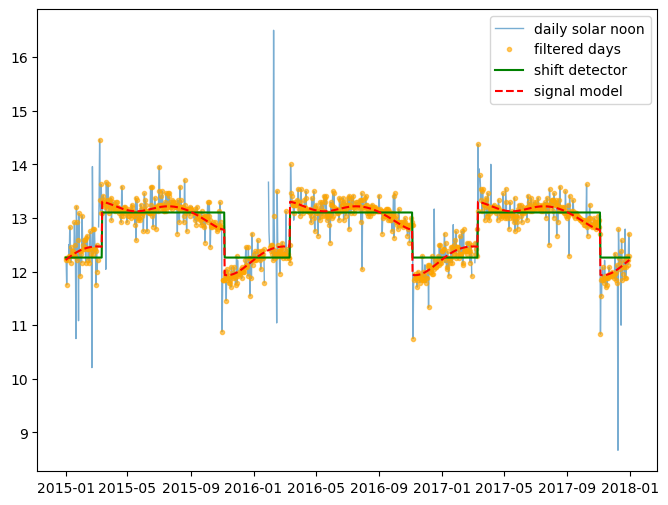

In [56]:
dh.plot_time_shift_analysis_results();

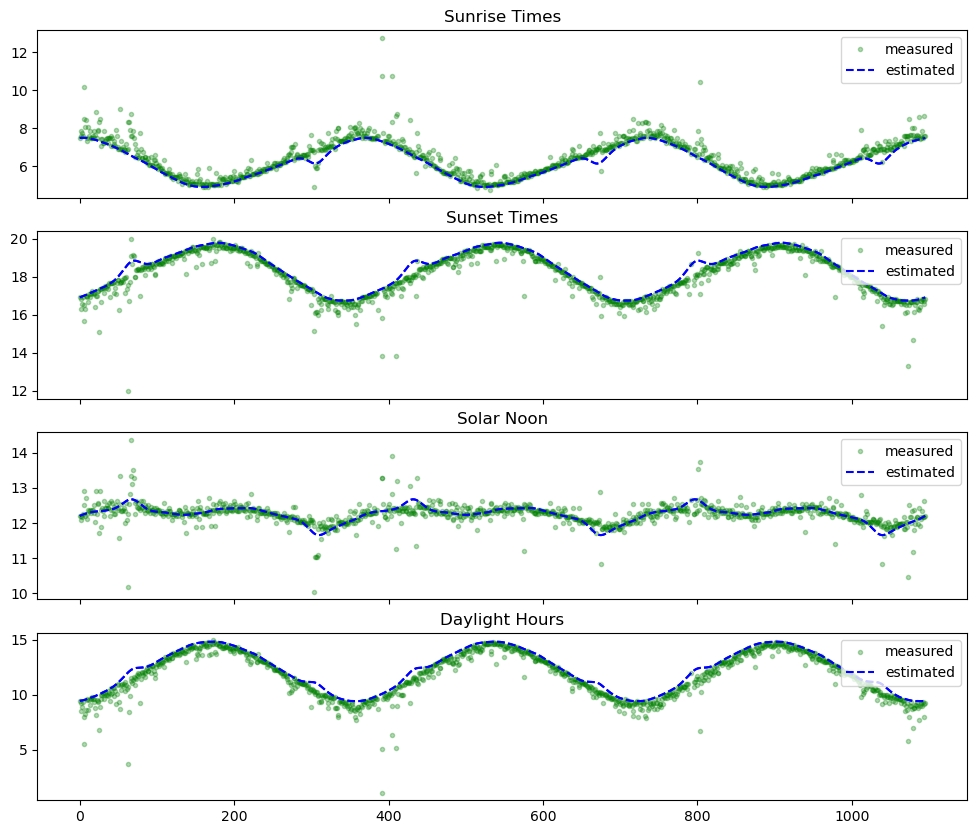

In [57]:
dh.daytime_analysis.calculate_times(data=dh.filled_data_matrix, plot=True);

In [75]:
dh.setup_location_and_orientation_estimation(-5)

In [59]:
dh.estimate_latitude()

38.11751833233333

In [73]:
dh.estimate_latitude()

37.298921813016825

In [76]:
dh.estimate_latitude()

38.532851078281396

In [62]:
dh.estimate_longitude()

-79.14409998432333

In [74]:
dh.estimate_longitude()

-79.30412340056127

In [64]:
dh.estimate_longitude()

-79.14409998432333

In [77]:
dh.estimate_longitude()

-79.17202656265944

In [78]:
# actual site location 
lat_actual = 39.4856
lon_actual = -76.6636
# run orientation estimation based on actual location
dh.estimate_orientation(latitude=lat_actual, longitude=lon_actual)

(23.049920959153162, 5.236678462198202)

In [79]:
dh.estimate_orientation(latitude=lat_actual, longitude=lon_actual)

(23.049906898552013, 5.236680434439781)

In [68]:
dh.estimate_orientation(latitude=lat_actual, longitude=lon_actual)

(23.049908755237187, 5.236680382708032)

In [69]:
dh.estimate_orientation(latitude=lat_actual, longitude=lon_actual)

(23.049894425959074, 5.236681929573795)

In [70]:
dh.estimate_orientation()

(20.795084930401973, -1.4570929519023332)

In [71]:
dh.estimate_location_and_orientation()

(38.11751833233333,
 -79.43753471967172,
 21.211374506392563,
 -1.6831857027372825)